In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [67]:
sales = pd.read_csv('train (2).csv')
sales.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5611,FDI08,18.200,reg,0.066432,Fruits and Vegetables,250.1092,OUT045,2002,NaN,Tier 2,Supermarket Type1,4233.1564
5176,FDM13,6.425,Low Fat,0.063533,Breakfast,133.0626,OUT017,2007,NaN,Tier 2,Supermarket Type1,1442.7886
8410,NCS06,7.935,Low Fat,0.000000,Household,263.6910,OUT046,1997,Small,Tier 1,Supermarket Type1,788.9730
2340,DRL35,15.700,Low Fat,0.000000,Hard Drinks,43.3770,OUT010,1998,NaN,Tier 3,Grocery Store,129.8310
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,NaN,Tier 3,Grocery Store,101.2016


In [4]:
#finding data shap
sales.shape

(8523, 12)

In [5]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
percent = sales.isnull().sum()*100/len(sales)
print(percent)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [8]:
#taking care of duplicted rows
sales.duplicated().any()


False

# handling missing values



In [9]:
sales['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [10]:
sales['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [11]:
mean_weight=sales['Item_Weight'].mean()
median_weight=sales['Item_Weight'].median()
print(mean_weight, median_weight)

12.857645184135976 12.6


In [12]:
sales['Item_Weight_Mean']= sales.Item_Weight.fillna(mean_weight)
sales['Item_Weight_Median']= sales.Item_Weight.fillna(median_weight)

In [13]:
sales.tail(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median
8503,FDQ44,20.500,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168,20.500000,20.500
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128,12.857645,12.600
8505,FDB46,10.500,Regular,0.094146,Snack Foods,210.8244,OUT018,2009,Medium,Tier 3,Supermarket Type2,2117.2440,10.500000,10.500
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650,17.250000,17.250
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950,5.880000,5.880
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646,11.350000,11.350
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804,8.100000,8.100
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504,13.800000,13.800
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560,17.500000,17.500
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392,20.700000,20.700


In [73]:
print('Original weight variable variance', sales['Item_Weight'].var())
print('Item weight variance after mean imputation', sales['Item_Weight_Mean'].var())
print('Item weight variance after median imputation', sales['Item_Weight_Median'].var())

Original weight variable variance 21.56168825983637


KeyError: 'Item_Weight_Mean'

<Axes: >

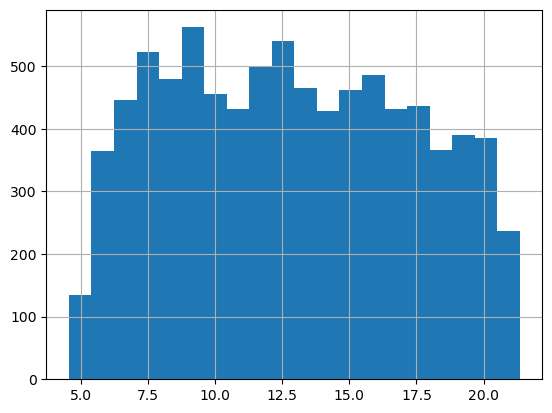

In [223]:
sales.Item_weight_interpolate.hist(bins=20)

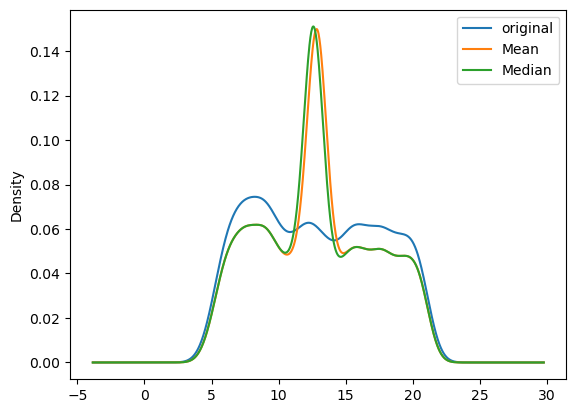

In [15]:
sales['Item_Weight'].plot(kind='kde', label='original')

sales['Item_Weight_Mean'].plot(kind='kde', label='Mean')

sales['Item_Weight_Median'].plot(kind='kde', label='Median')

plt.legend()
plt.show()
# as shown in the graph the mean and median values of the missing values has made the distribution altered, 
#centering most of the values clustered around the mean and median values

In [74]:
sales[['Item_Weight', 'Item_Weight_Mean', 'Item_Weight_Median']].boxplot()
#after applying the mean and median we can see a reduction in the spread of the data as shown in the boxplot below

KeyError: "['Item_Weight_Mean', 'Item_Weight_Median'] not in index"

In [75]:
#now we will fill the missing values by interpolation
sales['Item_weight_interpolate'] = sales['Item_Weight'].interpolate(method='linear').ravel()

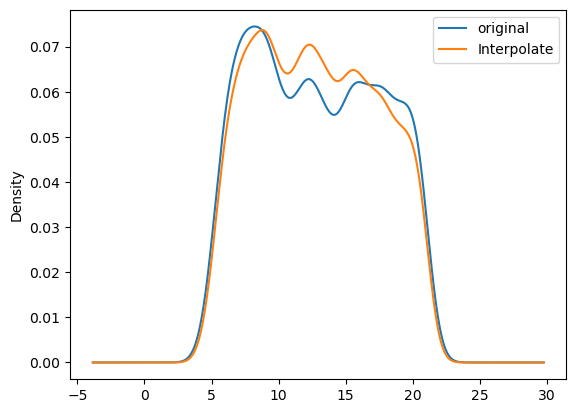

In [71]:
#comparing the item_weight column with the interpolated values
sales['Item_Weight'].plot(kind='kde', label='original')

sales['Item_weight_interpolate'].plot(kind='kde', label='Interpolate')

plt.legend()
plt.show()
#as we can see the interpolated values are similar to the original values, therefore the interpolation method will be our preferred method

In [19]:
#using k-nearest distribution
from sklearn.impute import KNNImputer

In [20]:
knn = KNNImputer(n_neighbors=10, weights='distance')

In [21]:
sales['knn_imputer']=knn.fit_transform(sales[['Item_Weight']])

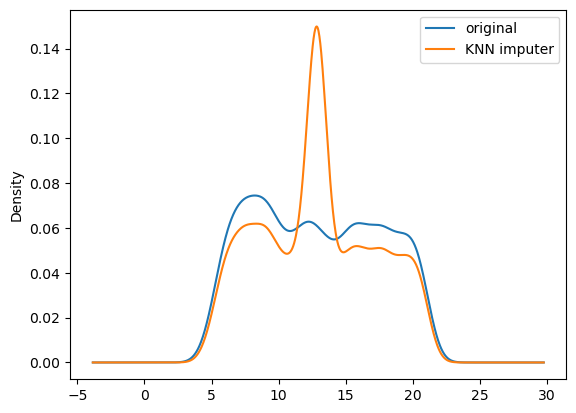

In [22]:
sales['Item_Weight'].plot(kind='kde', label='original')

sales['knn_imputer'].plot(kind='kde', label='KNN imputer')

plt.legend()
plt.show()

In [76]:
#deleting columns that will not be useful
sales = sales.drop(['Item_Weight'],axis=1)

In [77]:
sales.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_weight_interpolate         0
dtype: int64

## Filling the mssing values for outlet size

In [80]:
sales['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [41]:
sales['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

i'm going to fill the missing values in Outlet_Size based on Outlet_Type

In [81]:
outlet_mode=sales.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
outlet_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [88]:
sales.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_weight_interpolate      0
dtype: int64

In [82]:
missing_values=sales['Outlet_Size'].isnull()

In [83]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [61]:
missing_values = sales['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [63]:
sales.loc[missing_values,'Outlet_Type'] = sales.loc[missing_values,'Outlet_Type'].apply(lambda x:outlet_mode[x])

KeyError: nan

In [64]:
sales.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                  2410
Item_Outlet_Sales               0
Item_weight_interpolate         0
dtype: int64

In [87]:
sales.loc[missing_values, 'Outlet_Size']=sales.loc[missing_values, 'Outlet_Type'].apply(lambda x:outlet_mode[x])

## Item_Fat_Content

In [90]:
sales.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_weight_interpolate'],
      dtype='object')

In [97]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [96]:
sales.replace({'Item_Fat_Content':{'Low Fat':'LF', 'low fat':'LF', 'reg':'Regular'}},inplace=True)

## Item_Visibility

In [100]:
sales.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_weight_interpolate'],
      dtype='object')

In [101]:
sales['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [102]:
sales['Item_Visibility_interpolate']=sales['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [103]:
sales['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

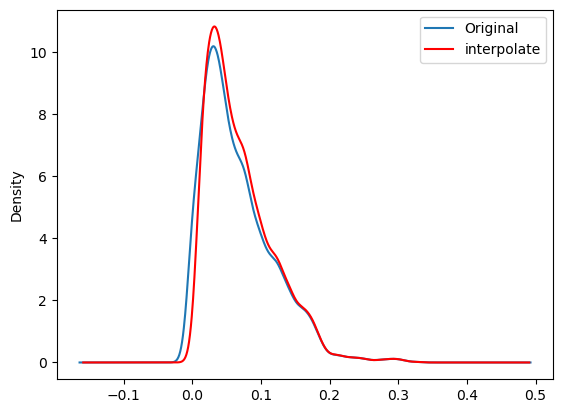

In [105]:
sales.Item_Visibility.plot(kind='kde', label='Original')

sales.Item_Visibility_interpolate.plot(kind='kde', color='red', label='interpolate')

plt.legend()
plt.show()

as we can see above, the distributions are closely similar, therefore we have handled the missing values for Item_visibility

In [106]:
sales=sales.drop('Item_Visibility', axis=1)

In [107]:
sales.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


## Item_Type

In [109]:
sales['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## Item_Identifier

In [117]:
sales.Item_Identifier.value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [115]:
#splitting the column Item_Identifier into the first two letters of the values
sales['Item_Identifier']=sales['Item_Identifier'].apply(lambda x: x[:2])

## Outlet_Establishment_Year

In [118]:
sales['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

### Getting the establishment outlet age


In [119]:
import datetime as dt

In [120]:
current_year=dt.datetime.today().year

In [121]:
current_year

2024

In [124]:
sales['Outlet_Age']=current_year - sales['Outlet_Establishment_Year']

In [127]:
sales=sales.drop('Outlet_Establishment_Year', axis=1)

In [128]:
sales.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolate,Item_Visibility_interpolate,Outlet_Age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


## Handling Categorical Values

### using ordinal anchoring

In [132]:
from sklearn.preprocessing import OrdinalEncoder

sales_encoded = sales .copy()

cat_cols = sales.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    sales_encoded[col] = oe.fit_transform(sales_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [133]:
sales_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [134]:
x = sales_encoded.drop('Item_Outlet_Sales', axis = 1)
y = sales_encoded['Item_Outlet_Sales']

In [136]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


## XGBRFRegressor 

In [145]:
from xgboost import XGBRFRegressor
XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf,x,y,cv=5,scoring='r2')
print(scores.mean())


0.5549992903957147


## XGBRFRegressor Feature Importances

In [224]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)
xg1 = xg.fit(x,y)
pd.DataFrame({
    'feature':x.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance', ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_Age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_interpolate,0.002493
8,Item_weight_interpolate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


In [180]:
['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Type','Item_weight_interpolate', 'Item_Identifier', 'Item_Fat_Content']

['Outlet_Location_Type',
 'Item_Visibility_interpolate',
 'Item_Type',
 'Item_weight_interpolate',
 'Item_Identifier',
 'Item_Fat_Content']

In [181]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg1,x.drop(['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Type','Item_weight_interpolate', 'Item_Identifier', 'Item_Fat_Content'], axis=1),y,cv=5,scoring='r2')
print(scores.mean())


0.5966037632320667


In [182]:
final_data = x.drop(columns=['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Type','Item_weight_interpolate', 'Item_Identifier', 'Item_Fat_Content'],axis=1)

In [183]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


In [184]:
from xgboost import XGBRFRegressor

In [185]:
xg_final = XGBRFRegressor()

In [186]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [188]:
x_train,x_test,y_train,y_test = train_test_split(final_data,y,test_size=0.2,random_state=42)

In [189]:
xg_final.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [190]:
y_pred = xg_final.predict(x_test)

In [195]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

## Prediction of unseen data

In [196]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [205]:
print(f"Sales Value is between {pred-713.95} and {pred+713.95}")

Sales Value is between 1353.13642578125 and 2781.03642578125



## Saving the model using Joblib

In [214]:
import joblib

In [215]:
joblib.dump(xg_final,'sales_model')

['sales_model']

In [216]:
model = joblib.load('sales_model')

In [217]:
model.predict(np.array([[141.6180,9.0,8.0,1.0,27]]))[0]

2067.0864

In [218]:
print(f"sales value is between {pred-713.95} and {pred+713.95}")

sales value is between 1353.13642578125 and 2781.03642578125
